<a href="https://colab.research.google.com/github/prativap1/DT-Ensemble/blob/main/DT_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [109]:
data = pd.read_csv("/content/talking_data.csv")
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [110]:
#Printing Dimension of datasets
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (100000, 8)
Number of rows in the dataset: 100000
Number of columns in the dataset: 8


In [111]:
# printing attributes (columns) name
print("Column Names:",data.columns.values)


Column Names: ['ip' 'app' 'device' 'os' 'channel' 'click_time' 'attributed_time'
 'is_attributed']


In [112]:

# Exploratory Data Analysis (EDA)

# Showing datatypes of the columns
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [113]:
# getting discriptive statistcs (Summary of the data)
data.describe()


,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [114]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val


ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [115]:
data = data.drop(['attributed_time'],axis=1)


In [116]:
data.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


# By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as                  float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.**


In [117]:
import datetime as dt

In [118]:
def timeFeatures(data):
    # Derive new features using the click_time column
    data['datetime'] = pd.to_datetime(data['click_time'])
    data['day_of_week'] = data['datetime'].dt.dayofweek
    data["day_of_year"] = data["datetime"].dt.dayofyear
    data["month"] = data["datetime"].dt.month
    data["hour"] = data["datetime"].dt.hour
    return data

In [119]:
data = timeFeatures(data)
data.drop(['click_time', 'datetime'], axis=1, inplace=True)
data.tail()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
99995,124883,11,1,19,122,0,3,313,11,13
99996,85150,9,1,13,244,0,1,311,11,11
99997,18839,3,1,13,19,0,2,312,11,11
99998,114276,15,1,12,245,0,2,312,11,17
99999,119349,14,1,15,401,0,1,311,11,14


In [120]:
corr = data.corr()
corr


,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955,0.057067,0.057067,NaN,-0.007955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426,-0.032182,-0.032182,NaN,0.026079
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695,-0.040110,-0.040110,NaN,0.012035
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183,-0.031336,-0.031336,NaN,0.014660
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336,0.000265,0.000265,NaN,-0.021326
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000,-0.000603,-0.000603,NaN,-0.002944
day_of_week,0.057067,-0.032182,-0.040110,-0.031336,0.000265,-0.000603,1.000000,1.000000,NaN,-0.274896
day_of_year,0.057067,-0.032182,-0.040110,-0.031336,0.000265,-0.000603,1.000000,1.000000,NaN,-0.274896
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,-0.007955,0.026079,0.012035,0.014660,-0.021326,-0.002944,-0.274896,-0.274896,NaN,1.000000


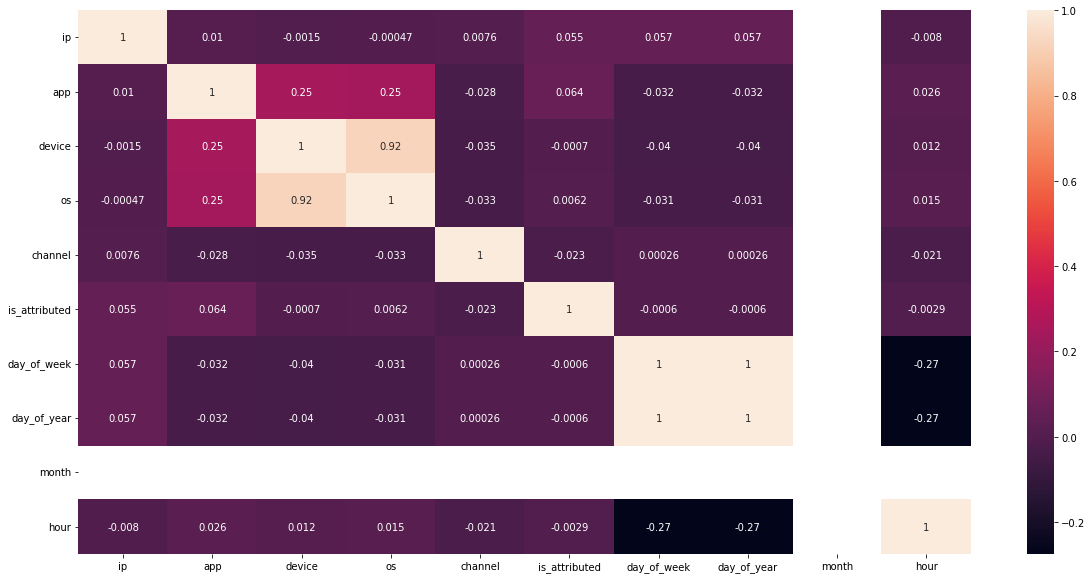

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [122]:
data.dtypes

ip               int64
app              int64
device           int64
os               int64
channel          int64
is_attributed    int64
day_of_week      int64
day_of_year      int64
month            int64
hour             int64
dtype: object

In [123]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

X = data.drop(['is_attributed'], axis=1)
y = data['is_attributed']


In [124]:
# Split X and y into training and test set in 80:20ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [125]:
## To have an accurate score, let us create another set of data with scaling function applied to it.

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.2, random_state=10)


In [126]:
X_train.dtypes

ip             int64
app            int64
device         int64
os             int64
channel        int64
day_of_week    int64
day_of_year    int64
month          int64
hour           int64
dtype: object

In [127]:
# Apply the Random forest model and print the accuracy of Random forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion ='entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))


The Random forest model accuracy is 0.99805
The confusion matrix of Random Forest Model is
[[19961     0]
 [   39     0]]


In [128]:

# Apply Adaboost Ensemble Algorithm for the same data and print the accuracy

from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

In [129]:
test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))


The Adaboost Ensemble model accuracy is 0.99765
The confusion matrix of Adaboost Ensemble model is
[[19951    10]
 [   37     2]]


In [130]:

#Apply Bagging Classifier Algorithm and print the accuracy

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))



The Bagging classifier model accuracy is 0.9984
The confusion matrix of Bagging classifier model is
[[19956     5]
 [   27    12]]


In [131]:

#Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl_score=gbcl.score(X_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))



The Gradient Boost classifier model accuracy is 0.9977
The confusion matrix of Gradient Boost classifier model is
[[19952     9]
 [   37     2]]


In [132]:

# Comparision of Models:

print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))



The Random forest model accuracy is 0.99805
The Adaboost Ensemble model accuracy is 0.99765
The Bagging classifier model accuracy is 0.9984
The Gradient Boost classifier model accuracy is 0.9977


Best performance is achieved by bagging classifier